## Support Vector Machine (SVM)
- **It works by finding the hyperplane in a high-dimensional space that maximally separates the different classes. In other words, it tries to find the best decision boundary between different classes of data.**
- **SVMs can also handle non-linearly separable data by transforming the data into a higher-dimensional space using kernel functions.**

**NOTE:** 
- Here we are using the Iris dataset with only two classes since SVM generates the hyperplane for two classes
- We can also use SVM for multiple classes but needs to be trained with one-and-all approach that is fixing one class and grouping all of the classes into a single class
- This is not demonstrated here

This code imports the iris dataset from the scikit-learn library.

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

**We are selecting only datapoints from two classes in this model**
- `iris.data[:, :2]` selects the first two features of the iris dataset and assigns it to X. 
- iris.target contains the class labels for each sample, where 0, 1, and 2 correspond to the setosa, versicolor, and virginica classes respectively. 
- The code then removes the samples and labels that correspond to the virginica class by selecting only the samples whose label is not equal to 2 using the boolean array indexing. 
- The resulting X and y contain the data and labels for only the setosa and versicolor classes.

In [27]:
X = iris.data[:, :2]
y = iris.target

X = X[y != 2]
y = y[y != 2]

This code snippet uses the train_test_split function from the sklearn.model_selection module to split the Iris dataset into training and testing sets. The dataset is split in such a way that 20% of the samples are reserved for testing, and the remaining 80% are used for training. The random_state parameter is set to 42 to ensure that the same random split is obtained each time the code is run. The resulting training and testing sets are stored in the variables X_train, X_test, y_train, and y_test. X_train and X_test contain the features (i.e., measurements) of the iris samples, and y_train and y_test contain their corresponding target labels (i.e., species).

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code snippet initializes and trains a Support Vector Machine (SVM) classifier using a linear kernel and a regularization parameter of C=1 on the training data (X_train, y_train) that were previously split from the iris dataset using train_test_split function. The trained model is stored in the variable named model.

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

y_pred is a numpy array containing the predicted class labels for the test set obtained using the trained Random Forest classifier model.

In [24]:
y_pred = model.predict(X_test)

This code calculates the accuracy score of the predicted values y_pred against the actual target values y_test using the accuracy_score function from the sklearn.metrics module. The calculated accuracy score is then printed to the console.

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


This code plots a hyperplane which is obtained by training our model on the dataset which separates the datapoints of two classes

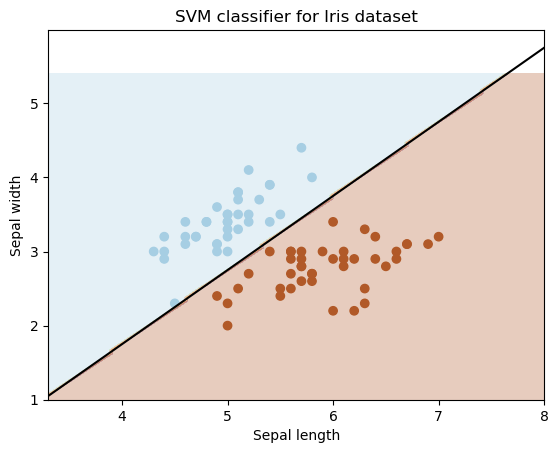

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

# Create mesh to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))

# Plot decision boundary and margins
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

# Plot hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx_hyper = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
yy_hyper = a * xx_hyper - (model.intercept_[0]) / w[1]
plt.plot(xx_hyper, yy_hyper, 'k-')

# Set plot labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM classifier for Iris dataset')

# Show plot
plt.show()